# TNT hand gestures study

# flow of program
DELETE BEFORE SUBMISSION

-   code to import data from 3 csv files held in the data folder
-   data is then combined in a dictionary and then converted to a pandas dataframe
-   the data is then cleaned and the columns are renamed
-   the data is then split into a training and testing set
-   a linear regression model is then fitted to the training data
-   the model is then used to predict the test data
-   the mean squared error and r2 score are then calculated
-   the results are then printed to the console


---
# Flow of the Program

The program is structured into several sequential phases that collectively process, analyze, and model gesture data acquired from the Phyphox app. Here is a breakdown of each step in the flow:

## Data Acquisition
1. **Data Import**: The data is imported for processing, collected via the Phyphox app.

## Feature Extraction
2. **Classifier Selection**: A decision is made on the method to extract features from the data. Options include:
   - **DBSCAN**: For density-based clustering, which involves:
     - Running permutations of `eps` and `min_samples` values.
     - Generating heatmaps to select the optimal parameters.
     - Executing the final DBSCAN clustering.
   - **KNN**: Applying the K-Nearest Neighbors algorithm.
   - **Linear Regression**: Using linear regression models to predict or classify data.
   - **Threshold Classification**: Implementing threshold-based classification to separate data into distinct classes.
3. **Label Data**: Post-classification, gestures are identified on the timeline.
4. **Correction**: Applying methods like diffusion and standard deviation to adjust and correct labels.

## Prediction Model
5. **Sliding Time Window Setup**:
   - Selecting the appropriate step size and window size for sliding time windows.
   - Creating dataframes from these windows, marking them as gestures or non-gestures.
6. **Data Splitting**: Dividing data into training, testing, and evaluation sets.
7. **Model Prediction**: Employing prediction models (such as KNN) to classify the gestures.
8. **Evaluation**: Assessing the accuracy and effectiveness of the prediction models.

## Presentation of Results
9. **Results**: Presenting the findings and outcomes from the analyses and predictions.

This structured approach allows for systematic data handling, from acquisition through to the presentation of results, ensuring clarity and efficiency in processing and analyzing gesture data.





---
#[DELETE BEFORE SUBMISSION]

@startuml
skinparam monochrome true

start

:Data Acquisition;
:Import Data;
note right: Data is collected using the Phyphox app.

:Feature Extraction;
if (Choose Classifier) then (DBSCAN)
  :Run permutations of eps and min_samples values for DBSCAN;
  :Run heatmaps to choose the best eps and min_samples;
  :Run DBSCAN for final clustering;
elseif (KNN) then (KNN)
  :Run KNN Classifier;
elseif (Linear Regression) then (Linear Regression)
  :Run Linear Regression Model;
else (Threshold Classification)
  :Apply Threshold Classification;
endif
:Label data by identifying gestures on the timeline;
:Apply diffusion and standard deviation to correct labels;

:Prediction Model;
:Choose right step size and window size for sliding time window;
:Make dataframes from sliding windows;
note right: Mark dataframes as gestures or non-gestures.
:Split train, test, and evaluation data;
:Perform prediction using models (KNN, etc.);
:Evaluate accuracies of prediction models;

:Present Results;

stop

@enduml

---



![flow of program.png](<attachment:flow of program.png>)

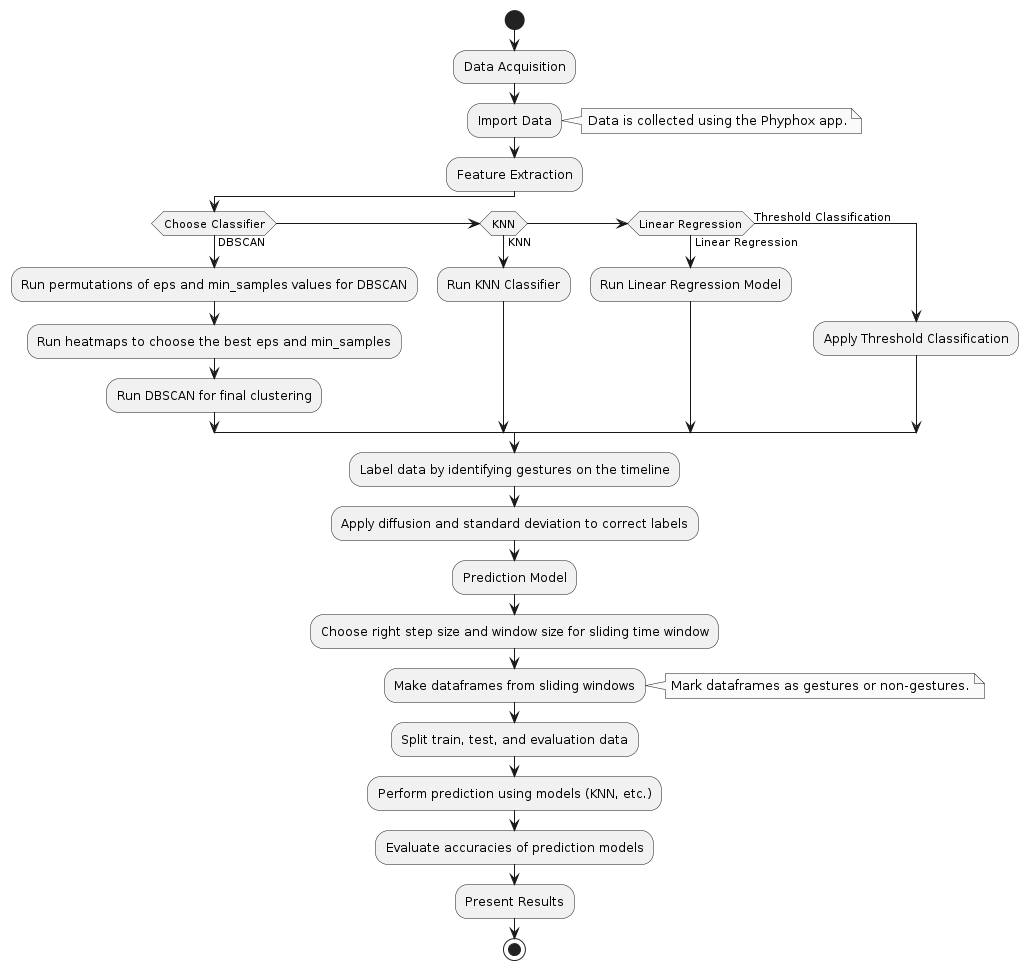

# Library Installation
Before starting our analysis, we need to install several Python libraries that are essential for data manipulation, analysis, and machine learning:

- **pandas**: For data handling and manipulation.
- **numpy**: For numerical operations.
- **matplotlib**: For creating static, animated, and interactive visualizations.
- **seaborn**: For high-level interface for drawing attractive and informative statistical graphics.
- **scikit-learn**: For implementing machine learning algorithms.

These libraries provide the necessary tools to process and analyze the data effectively, supporting our efforts in gesture recognition.


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

# Information Section


## Data Collection Declaration
- This project is part of a Data Science and Machine Learning class and was carried out by student developers at the University of Nottingham, adhering to all legal and ethical guidelines.

## Legal Aspects
- The data collection complied with all applicable laws and university policies. Personal data has been anonymized to protect individual privacy. Note that all use of this data must adhere to relevant data protection and privacy laws, and unauthorized use is prohibited.

## Data Information
- The dataset is in CSV format with specified columns. Further details about column names and types should be added here.

# Importing Libraries

The following libraries are imported to facilitate data manipulation, analysis, and machine learning:
- **Pandas**: For data handling and manipulation.
- **NumPy**: For numerical operations.
- **os**: For interacting with the operating system.
- **Matplotlib**: For creating visualizations.
- **Seaborn**: For enhanced statistical visualizations.
- **Scikit-learn**: Includes tools for machine learning, such as model training, regression, classification, and clustering algorithms.
- **math**: Provides access to mathematical functions.

These libraries form the backbone of our analysis, supporting various data processing, analysis, and machine learning tasks.


In [ ]:
#-----------------Information-----------------#

'''
    Title: [Pick up a tile for the paper]
    Data Collection Declaration:

    This project is being developed for a Data Science and Machine Learning class.
    The data used in this project was collected by the student developers at the University of Nottingham. 

    Legal Aspects:

    The data collection process complied with all applicable laws and university policies. 
    Any personal data that was collected has been anonymized to protect the privacy of the individuals involved. 

    Please note that the use of this data must comply with all relevant data protection and privacy laws. 
    Unauthorized use, disclosure, or duplication of this data is strictly prohibited.
'''
'''
    Data Information:

    Data within the dataset being examined is of the format of a csv file with the following columns:
    Column Names and Types:
    
'''

#-----------------Information-----------------#

#-----------------Importing Libraries-----------------#

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# import k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# import SVC
from sklearn.svm import SVC


# import 5 fold cross validation
from sklearn.model_selection import cross_val_score
# import grid search
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
# import min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


#-----------------Importing Libraries-----------------#

In [ ]:

#-----------------Flags-----------------#

SYS_MSG = True # Flag to toggle control over printing system messages to console 
PLOT_ALL = False # Flag to toggle control over plotting all graphs
PLOT = True # Flag to toggle control over plotting graphs
FOLLOW_GESTURE = ['circles']
FOLLOW_KEY = ['data_anakha_circles_Anticlockwise flat'] # list of Key to follow for plotting graphs. Key is the name of the gesture to be followed, named as per the data file name.
# FOLLOW_GESTURE = 'come here'
# FOLLOW_KEY = 'data_anakha_come here_Come here horizontal' # Key to follow for plotting graphs. Key is the name of the gesture to be followed, named as per the data file name.
# FOLLOW_GESTURE = 'go away'
# FOLLOW_KEY = 'data_anakha_go away_Go away horizontal' # Key to follow for plotting graphs. Key is the name of the gesture to be followed, named as per the data file name.
# FOLLOW_GESTURE = 'wave'
# FOLLOW_KEY = 'data_anakha_wave_Wave flat left focused' # Key to follow for plotting graphs. Key is the name of the gesture to be followed, named as per the data file name.

#-----------------Flags-----------------#

#-----------------Selecting labelling Classifiers and their parameters-----------------#


Labeling_Classifiers = ['DBSCAN'] # List of labelling classifiers to be used. Select for DBSCAN
# Labeling_Classifiers = ['KNN'] # List of labelling classifiers to be used. Select for KNN
# Labeling_Classifiers = ['Linear Regression'] # List of labelling classifiers to be used. Select for Linear Regression
# Labeling_Classifiers = ['Threshold'] # List of labelling classifiers to be used. Select for Threshold


# DBSCAN
eps = [0.1, 0.2, 0.3, 0.4, 0.5] # List of eps values to be used for DBSCAN
min_samples = [20, 30, 50, 100, 200] # List of min_samples values to be used for DBSCAN
aimed_unique_clusters = 4 # Number of unique clusters aimed to be obtained from DBSCAN
interpolation_limit = 30 # Limit of interpolation to be used for DBSCAN


# KNN
n_neighbors = [3, 5, 7, 9, 11] # List of n_neighbors values to be used for KNN

# Linear Regression dictionary

# Threshold dictionary

#-----------------Selecting labelling Classifiers and their parameters-----------------#

#-----------------Sliding Time Window-----------------#

# Sliding Time Window Parameters
stw = 0 # Sliding Time Window
stws = 0 # Sliding Time Window step

#-----------------Sliding Time Window-----------------#


#-----------------Basic Functions-----------------#

# Function to print system messages
def print_sys_msg(msg):
    if SYS_MSG:
        print('-'*10+'System control message'+'-'*10+'\t\t'+msg)

# Function to print normal messages
def print_msg(msg):
    print('-'*10+'Message from program'+'-'*10+'\t'+msg)

#-----------------Basic Functions-----------------#

# Preperation Phase  
We create base classes to manage our data, visualisation, analysis, and prediction.

---

## DataHandler Class

The `DataHandler` class is designed for comprehensive data management, encompassing data import, manipulation, and preprocessing functionalities.

## Class Overview
- **Purpose**: Manages data through various stages from import to preprocessing, ensuring data is ready for analysis.
- **Managed by**: Samarth
- **Created on**: 03/02/2024
- **Modified on**: 03/02/2024
- **Contact**: psxs2@nottingham.ac.uk

## Key Functionalities
- `import_data(files)`: Imports and combines multiple CSV files into a single DataFrame. Example usage: `data.import_data(['data/member1.csv', 'data/member2.csv'])`
- `import_data_system(directories)`: Imports data from specified directories within the system, catering to structured data storage.
- `data_shape()`, `data_head()`, `data_info()`, `data_describe()`: Provides basic data explorations like shape, head, info, and descriptive statistics of the DataFrame.
- `data_null()`, `data_corr()`: Offers methods to check for null values and compute correlation matrices.
- `drop_duplicates()`, `drop_null()`, `drop_negative_time()`: Functions to clean the DataFrame by removing duplicates, null values, and negative time entries.
- `min_max_normalization()`, `standardization()`: Methods for data normalization and standardization to prepare data for machine learning algorithms.
- `store_data_with_name(file_name)`, `store_data_with_current_date_time()`: Functions to store the processed data into CSV files, optionally using the current date and time as part of the file name.

Each function is crafted to simplify the data handling process, ensuring that data is clean, well-organized, and ready for subsequent analysis steps.


In [ ]:
#-----------------DataHandler Class-----------------#
'''
Class DataHandler
    purpose: import and manage data (data manipulation, data wrangling, and data preprocessing)

    initialization example:
        data = DataHandler()
    
    functions:
    - import_data: import data from csv files and combine them into a single dataframe
        dependencies used: pandas
        function call example: data.import_data(['data/member1.csv', 'data/member2.csv', 'data/member3.csv'])
        input: list of file names
        output: modifies internal DataFrame 'df' by combining data from specified files
    
    - import_data_system: import data from system directories
        dependencies used: pandas, os
        function call example: data.import_data_system(['data/member1/type_of_gesture/', 'data/member2/type_of_gesture/', 'data/member3/type_of_gesture/'])
        input: list of directory paths
        output: modifies internal dictionary 'data' by adding dataframes loaded from specified directories
        
    - data_shape: print the shape of the dataframe
        dependencies used: pandas
        function call example: data.data_shape()
        input: none
        output: prints the shape of DataFrame 'df'

    - data_head: print the first 5 rows of the dataframe
        dependencies used: pandas
        function call example: data.data_head()
        input: none
        output: prints the first five rows of DataFrame 'df'

    - data_info: print the information of the dataframe
        dependencies used: pandas
        function call example: data.data_info()
        input: none
        output: prints the information of DataFrame 'df'

    - data_describe: print the description of the dataframe
        dependencies used: pandas
        function call example: data.data_describe()
        input: none
        output: prints statistical description of DataFrame 'df'

    - data_null: print the null values in the dataframe
        dependencies used: pandas
        function call example: data.data_null()
        input: none
        output: prints the count of null values in each column of DataFrame 'df'
    
    - data_corr: print the correlation matrix of the dataframe
        dependencies used: pandas
        function call example: data.data_corr()
        input: none
        output: prints the correlation matrix of DataFrame 'df'

    - drop_duplicates: drop duplicates from the dataframe        
        dependencies used: pandas
        function call example: data.drop_duplicates()
        input: none
        output: removes duplicate rows in DataFrame 'df'

    - drop_null: drop null values from the dataframe     
        dependencies used: pandas
        function call example: data.drop_null()
        input: none
        output: removes rows with null values in DataFrame 'df'
    
    - drop_negative_time: drop rows with negative time values
        dependencies used: pandas
        function call example: data.drop_negative_time()
        input: none
        output: removes rows where 'Time (s)' is negative in DataFrame 'df'

    - drop_missing: drop rows with missing values
        dependencies used: pandas
        function call example: data.drop_missing()
        input: none
        output: removes rows with missing values in DataFrame 'df'

    - fill_missing: fill missing values with mean of the column
        dependencies used: pandas
        function call example: data.fill_missing()
        input: none
        output: fills missing values with mean of the column in DataFrame 'df'

    - fill_missing_median: fill missing values with median of the column
        dependencies used: pandas
        function call example: data.fill_missing_median()
        input: none
        output: fills missing values with median of the column in DataFrame 'df'

    - fill_missing_mode: fill missing values with mode of the column
        dependencies used: pandas
        function call example: data.fill_missing_mode()
        input: none
        output: fills missing values with mode of the column in DataFrame 'df'

    - min_max_normalization: normalize data using min-max normalization
        dependencies used: pandas
        function call example: data.min_max_normalization()
        input: none
        output: normalizes data using min-max normalization in DataFrame 'df'

    - standardization: standardize data using standardization
        dependencies used: pandas
        function call example: data.standardization()
        input: none
        output: standardizes data using standardization in DataFrame 'df'

    - add_to_data: add data to the dataframe
        dependencies used: pandas
        function call example: data.add_to_data(data)
        input: data (DataFrame)
        output: adds data to DataFrame 'df'

    - store_data_with_name: store data to a csv file with a specified name  
        dependencies used: pandas
        function call example: data.store_data_with_name('data.csv')
        input: file_name (string)
        output: stores DataFrame 'df' to a csv file with the specified name

    - store_data_with_current_date_time: store data to a csv file with current date and time
        dependencies used: pandas
        function call example: data.store_data_with_current_date_time()
        input: none
        output: stores DataFrame 'df' to a csv file with the current date and time

    - store_data_with_index: store data to a csv file with an index
        dependencies used: pandas
        function call example: data.store_data_with_index()
        input: none
        output: stores DataFrame 'df' to a csv file with an index
        
- Managed by: Samarth
- Created on: 03/02/2024
- Modified on: 03/02/2024
- Contact: psxs2@nottingham.ac.uk
'''
class DataHandler:
    number_of_files = 0
    data = None
    df = None

    def __init__(self):
        print_sys_msg('DataHandler:__init__: DataHandler object created')
    #-----------------Data Import Functions-----------------#
    
    # declaration example - data = DataHandler.import_data(['data/member1.csv', 'data/member2.csv', 'data/member3.csv'])
    def import_data(self, files):
            print_sys_msg('DataHandler:import_data: importing data from 3 csv files and combining them into a single dataframe')
            number_of_files = len(files)
            for i in range(number_of_files):
                if i == 0:
                    self.df = pd.read_csv(files[i])
                    self.data = {'data_'+str(i+1): pd.read_csv(files[i])}
                else:
                    self.df = pd.concat([self.df, pd.read_csv(files[i])], ignore_index=True)
                    self.data['data_'+str(i+1)] = pd.read_csv(files[i])
            print_sys_msg('DataHandler:import_data: data imported successfully')

    # declaration example - data = DataHandler.import_data_system(['data/member1/type_of_gesture/', 'data/member2/type_of_gesture/', 'data/member3/type_of_gesture/'])
    def import_data_system(self, directorys):
        print_sys_msg('DataHandler:import_data: importing data from the system')
        
        # all files are stored in the format data/member1/type_of_gesture/gesture1/Raw Data.csv

        # getting the number of members
        number_of_members = len(directorys)

        print_sys_msg('DataHandler:import_data: number of members: '+str(number_of_members))

        for i in range(number_of_members):
            # member name from the directory
            member = directorys[i].split('/')[1]
            # gesture name from the directory
            gesture = directorys[i].split('/')[2]
            # getting the number of gestures
            number_of_gestures = len(os.listdir(directorys[i]))

            print_sys_msg('DataHandler:import_data: member: '+member)
            print_sys_msg('DataHandler:import_data: gesture name: '+gesture)
            print_sys_msg('DataHandler:import_data: number of gestures: '+str(number_of_gestures))
            
            for j in range(number_of_gestures):
                # reading name of each gesture and then grabbing the 'Raw Data.csv' file from it
                gesture_name = os.listdir(directorys[i])[j]
                
                # reading the 'Raw Data.csv' file inside the gesture folder
                # if self.data is None:
                #     self.data = {'data_'+member+'_'+gesture+'_'+'_'+str(j+1): pd.read_csv(directorys[i]+gesture_name+'/Raw Data.csv')}
                if self.data is None:
                    self.data = {'data_'+member+'_'+gesture+'_'+gesture_name: pd.read_csv(directorys[i]+gesture_name+'/Raw Data.csv')}                
                # else: 
                #   self.data['data_'+member+'_'+gesture+'_'+str(j+1)] = pd.read_csv(directorys[i]+gesture_name+'/Raw Data.csv')
                else:
                    self.data['data_'+member+'_'+gesture+'_'+gesture_name] = pd.read_csv(directorys[i]+gesture_name+'/Raw Data.csv')

                # # adding gesture_name to the dictionary of data
                # self.data['data_'+member+'_'+gesture+'_'+str(j+1)]['Gesture'] = gesture_name
        
        print_sys_msg('DataHandler:import_data: data imported successfully')
        # print the dictionary names 
        print_sys_msg('DataHandler:import_data: printing the dictionary names')
        print_sys_msg(str(self.data.keys()))
        

        
    #-----------------Data Import Functions-----------------#
    #-----------------Folder Creation Functions-----------------#

    def create_folder(self, folder_name):
        # break the folder name into parts and check if each part exists including the last part
        # if not create the folder
        print_sys_msg('DataHandler:create_folder: creating folder -> '+folder_name)
        parts = folder_name.split('/')
        worked_through = ''
        for i in range(len(parts)):
            print_sys_msg('DataHandler:create_folder: checking if folder exists -> '+parts[i])
            if not os.path.exists(worked_through + parts[i]):
                print_sys_msg('DataHandler:create_folder: folder does not exist -> '+parts[i])
                os.makedirs(worked_through + parts[i])
                print_sys_msg('DataHandler:create_folder: folder created -> '+parts[i])
            worked_through = worked_through + parts[i] + '/'
        print_sys_msg('DataHandler:create_folder: folder created successfully')

    #-----------------Folder Creation Functions-----------------#               
    
    #-----------------Basic Data Wrangling Functions-----------------#
    
    def data_shape(self):
        print_sys_msg('DataHandler:data_shape: printing the shape of the dataframe')
        print_sys_msg(str(self.df.shape))
        
    def data_head(self):
        print_sys_msg('DataHandler:data_head: printing the first 5 rows of the dataframe')
        print_sys_msg(str(self.df.head()))
    
    def data_info(self):
        print_sys_msg('DataHandler:data_info: printing the information of the dataframe')
        print_sys_msg(str(self.df.info()))
                      
    def data_describe(self):
        print_sys_msg('DataHandler:data_describe: printing the description of the dataframe')
        print_sys_msg(str(self.df.describe()))
                      
    def data_null(self):
        print_sys_msg('DataHandler:data_null: printing the null values in the dataframe')
        print_sys_msg(str(self.df.isnull().sum()))
                      
    def data_corr(self):
        print_sys_msg('DataHandler:data_corr: printing the correlation matrix of the dataframe')
        print_sys_msg(str(self.df.corr()))
    
    def data_missing(self):
        print_sys_msg('DataHandler:data_missing: printing the missing values in the dataframe')
        print_sys_msg(str(self.df.isna().any(axis=1)))
    #-----------------Basic Data Wrangling Functions-----------------#
        
    #-----------------Data Preprocessing Functions-----------------#

    # add_to_data: add data to the dataframe
    def add_to_data(self, data):
        print_sys_msg('DataHandler:add_to_data: adding data to the dataframe')
        self.df = pd.concat([self.df, data], ignore_index=True)

    def drop_duplicates(self):
        print_sys_msg('DataHandler:drop_duplicates: dropping duplicates')
        self.df = self.df.drop_duplicates()
    
    def drop_null(self):
        print_sys_msg('DataHandler:drop_null: dropping null values')
        self.df = self.df.dropna()


    # def drop_outliers(self):
    #     print_sys_msg('DataHandler:drop_outliers: dropping outliers'
    #     self.df = self.df[(self.df['Linear Acceleration x (m/s^2)'] > -10) & (self.df['Linear Acceleration x (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Linear Acceleration y (m/s^2)'] > -10) & (self.df['Linear Acceleration y (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Linear Acceleration z (m/s^2)'] > -10) & (self.df['Linear Acceleration z (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Absolute acceleration (m/s^2)'] > 0) & (self.df['Absolute acceleration (m/s^2)'] < 10)]

    def drop_negative_time(self):
        print_sys_msg('DataHandler:drop_negative_time: dropping negative time values')
        self.df = self.df[self.df['Time (s)'] > 0]

    # missing values handling - drop rows with missing values
    def drop_missing(self, threshold=3):
        print_sys_msg('DataHandler:drop_missing: dropping missing values')
        self.df = self.df.dropna(thresh=threshold).copy()

    # missing values handling - fill missing values with mean of the column
    def fill_missing(self):
        print_sys_msg('DataHandler:fill_missing: filling missing values with mean of the column')
        self.df = self.df.fillna(self.df.mean())

    # missing values handling - fill missing values with median of the column
    def fill_missing_median(self):
        print_sys_msg('DataHandler:fill_missing_median: filling missing values with median of the column')
        self.df = self.df.fillna(self.df.median())
    
    # missing values handling - fill missing values with mode of the column
    def fill_missing_mode(self):
        print_sys_msg('DataHandler:fill_missing_mode: filling missing values with mode of the column')
        self.df = self.df.fillna(self.df.mode().iloc[0])
    
    # missing values handling - fill missing values with bill debth of the column
    #-----------------------------------
    #-----------------------------------To be written
    #-----------------------------------
    
    # data normalization - min-max normalization
    def min_max_normalization(self):
        print_sys_msg('DataHandler:min_max_normalization: min-max normalization')
        self.df = (self.df - self.df.min()) / (self.df.max() - self.df.min())
    
    # data normalization - standardization
    def standardization(self):
        print_sys_msg('DataHandler:standardization: standardization')
        self.df = (self.df - self.df.mean()) / self.df.std()
    

    #-----------------Data Preprocessing Functions-----------------#


    #-----------------Data Splitting Functions-----------------#
    
    #-----------------Data Splitting Functions-----------------#
        
    #-----------------Storing Data Functions-----------------#

    def store_data_with_name(self, file_name):
        print_sys_msg('DataHandler:store_data: storing data to a csv file')
        self.df.to_csv(file_name, index=False)
    
    def store_data_with_current_date_time(self):
        print_sys_msg('DataHandler:store_data_with_current_date_time: storing data to a csv file with current date and time')
        self.df.to_csv('data_'+str(pd.to_datetime('today'))+'.csv', index=False)
    
    def store_data_with_index(self):
        print_sys_msg('DataHandler:store_data_with_index: storing data to a csv file with index')
        
        # data is stored with index only
        # getting the highest index of the data in the data folder and then incrementing it by 1
        # storing the data with the new index
        #-----------------------------------
        #-----------------------------------To be written

    #-----------------Storing Data Functions-----------------#

#-----------------DataHandler Class-----------------#

## Data Visualization Class

Next we make a basic visualization class that will manage the plotting and core visualization functions.

In [ ]:
#-----------------DataVisualization Class-----------------#
'''
Class DataVisualization

    purpose: visualize data (data visualization)
    charts included: line, scatter, bar, histogram, box plot, violin plot, bullet, table, sparkline, connected scatter plot, box, pie, doughnut, gauge, waffle
    
    functions:
    -  __init__: initialize the object
        dependencies used: none
        function call example: data_visualization = DataVisualization()
        input: none
        output: none

    - switch_to_seaborn: switch to seaborn
        dependencies used: none
        function call example: data_visualization.switch_to_seaborn(True)
        input: boolean flag
        output: none

    - add_index: add index
        dependencies used: none
        function call example: data_visualization.add_index(index)
        input: index
        output: none

    - add_data: add data
        dependencies used: none
        function call example: data_visualization.add_data(data)
        input: data
        output: none

    - plot_chart: plot chart
        dependencies used: matplotlib, seaborn
        function call example: data_visualization.plot_chart('line', 'cyan', 0.8)
        input: type, color, thickness
        output: none

    - set_grid_params: set grid parameters
        dependencies used: matplotlib
        function call example: data_visualization.set_grid_params(2, 2, 20, 5, 'Title')
        input: rows, cols, figsize_x, figsize_y, title
        output: none

    - plot_grid_1d: plot grid 1d
        dependencies used: matplotlib, seaborn
        function call example: data_visualization.plot_grid_1d(0, 'line', 'x', 'y', 'Title', 'cyan', 0.8)
        input: count, type, name_x, name_y, plot_title, color, thickness    
        output: none

    - plot_grid_2d: plot grid 2d
        dependencies used: matplotlib, seaborn
        function call example: data_visualization.plot_grid_2d(0, 0, 'line', 'x', 'y', 'Title', 'cyan', 0.8)
        input: row, col, type, name_x, name_y, plot_title, color, thickness
        output: none

    - set_x_label: set x label
        dependencies used: matplotlib
        function call example: data_visualization.set_x_label('x')
        input: label
        output: none

    - set_y_label: set y label
        dependencies used: matplotlib
        function call example: data_visualization.set_y_label('y')
        input: label
        output: none

    - set_x_tick_labels: set x tick labels
        dependencies used: matplotlib
        function call example: data_visualization.set_x_tick_labels(labels)
        input: labels
        output: none

    - set_y_tick_labels: set y tick labels
        dependencies used: matplotlib
        function call example: data_visualization.set_y_tick_labels(labels)
        input: labels
        output: none

    - figure_size: set figure size
        dependencies used: matplotlib
        function call example: data_visualization.figure_size(20, 5)
        input: width, height
        output: none

    - set_title: set title
        dependencies used: matplotlib
        function call example: data_visualization.set_title('Title')
        input: title
        output: none

    - clear_plot: clear plot
        dependencies used: matplotlib
        function call example: data_visualization.clear_plot()
        input: none
        output: none

    - show_plot: show plot
        dependencies used: matplotlib
        function call example: data_visualization.show_plot()
        input: none
        output: none
   
- Managed by: 
- Created on: 03/02/2024
- Modified on: 03/02/2024
- Contact: @nottingham.ac.uk
'''
class DataVisualization:
    
    # boolean flag to determine if the plot is matplotlib or seaborn
    is_seaborn = False

    def __init__(self, index):
        self.add_index(index)
        self.data = []

    def switch_to_seaborn(self, flag):
        self.is_seaborn = flag

    def add_index(self, index):
        self.index = index.copy()

    def add_data(self, data):
        self.data = data.copy()

    # def plot_chart(self, type, c='cyan', thickness=0.8, legend=None):
    def plot_chart(self, type, name_x, name_y, plot_title, c='cyan', thickness=0.8, legend=None):
        # charts included: line, scatter, bar, histogram, box plot, violin plot, bullet, table, sparkline, connected scatter plot, box, pie, doughnut, gauge, waffle
        if type == 'line':
            sns.lineplot(x=self.index, y=self.data, c=c, linewidth=thickness) if self.is_seaborn else plt.plot(self.index, self.data, c=c, linewidth=thickness)
        elif type == 'scatter':
            sns.scatterplot(x=self.index, y=self.data, c=c) if self.is_seaborn else plt.scatter(self.index, self.data, c=c)
        elif type == 'bar':
            sns.barplot(x=self.index, y=self.data, c=c) if self.is_seaborn else plt.bar(self.index, self.data, c=c)
        elif type == 'histogram':
            sns.histplot(self.data, c=c) if self.is_seaborn else plt.hist(self.data, c=c)
        elif type == 'box plot':
            sns.boxplot(self.data, c=c) if self.is_seaborn else plt.boxplot(self.data, c=c)
        elif type == 'violin plot':
            sns.violinplot(self.data, c=c) if self.is_seaborn else plt.violinplot(self.data, c=c)
        elif type == 'bullet':
            sns.bullet(self.data, c=c) if self.is_seaborn else plt.bullet(self.data, c=c)
        elif type == 'table':
            sns.table(self.data, c=c) if self.is_seaborn else plt.table(self.data, c=c)
        elif type == 'sparkline':
            sns.sparkline(self.data, c=c) if self.is_seaborn else plt.sparkline(self.data, c=c)
        elif type == 'connected scatter plot':
            sns.lineplot(x=self.index, y=self.data, sort=False, c=c) if self.is_seaborn else plt.plot(self.index, self.data, c=c)
        elif type == 'box':
            sns.boxplot(self.data, c=c) if self.is_seaborn else plt.boxplot(self.data, c=c)
        elif type == 'pie':
            plt.pie(self.data, labels=self.index)
        elif type == 'doughnut':
            plt.pie(self.data, labels=self.index, wedgeprops=dict(width=0.5))
        elif type == 'gauge':
            plt.pie(self.data, labels=self.index, wedgeprops=dict(width=0.2))
        elif type == 'waffle':
            plt.pie(self.data, labels=self.index, wedgeprops=dict(width=0.1))
        else:
            print('Invalid chart type')
        
        if legend is not None:
            plt.legend(legend, loc='upper right')
    
    def set_grid_params(self, rows, cols, figsize_x, figsize_y, title):
        if rows <= 0 or cols <= 0:
            print_sys_msg('DataVisualization:set_grid_params: rows and cols should be greater than 0')
            return
        self.fig, self.ax = plt.subplots(rows, cols, figsize=(figsize_x, figsize_y))
        self.fig.suptitle(title)
    
    def plot_grid_1d(self, count, type, name_x, name_y, plot_title, c= 'cyan', thickness=0.8, legend=None):
        
        if count <= 1:
            self.plot_chart(type, color, thickness)
            return
        self.ax[count].set_xlabel(name_x)
        self.ax[count].set_ylabel(name_y)
        self.ax[count].set_title(plot_title)
        if type == 'line':
            sns.lineplot(x=self.index, y=self.data, c=c, linewidth=thickness, ax=self.ax[count]) if self.is_seaborn else self.ax[count].plot(self.index, self.data, c=c, linewidth=thickness)
        elif type == 'scatter':
            sns.scatterplot(x=self.index, y=self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].scatter(self.index, self.data, c=c)
        elif type == 'bar':
            sns.barplot(x=self.index, y=self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].bar(self.index, self.data, c=c)
        elif type == 'histogram':
            sns.histplot(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].hist(self.data, c=c)
        elif type == 'box plot':
            sns.boxplot(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].boxplot(self.data, c=c)
        elif type == 'violin plot':
            sns.violinplot(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].violinplot(self.data, c=c)
        elif type == 'bullet':
            sns.bullet(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].bullet(self.data, c=c)
        elif type == 'table':
            sns.table(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].table(self.data, c=c)
        elif type == 'sparkline':
            sns.sparkline(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].sparkline(self.data, c=c)
        elif type == 'connected scatter plot':
            sns.lineplot(x=self.index, y=self.data, sort=False, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].plot(self.index, self.data, c=c)
        elif type == 'box':
            sns.boxplot(self.data, c=c, ax=self.ax[count]) if self.is_seaborn else self.ax[count].boxplot(self.data, c=c)
        elif type == 'pie':
            self.ax[count].pie(self.data, labels=self.index)
        elif type == 'doughnut':
            self.ax[count].pie(self.data, labels=self.index, wedgeprops=dict(width=0.5))
        elif type == 'gauge':
            self.ax[count].pie(self.data, labels=self.index, wedgeprops=dict(width=0.2))
        elif type == 'waffle':
            self.ax[count].pie(self.data, labels=self.index, wedgeprops=dict(width=0.1))
        else:
            print('Invalid chart type')

        if legend is not None:
            self.ax[count].legend(legend, loc='upper right')

    def plot_grid_2d(self, row, col, type, name_x, name_y, plot_title, c='cyan', thickness=0.8, legend=None):
        self.ax[row, col].set_xlabel(name_x)
        self.ax[row, col].set_ylabel(name_y)
        self.ax[row, col].set_title(plot_title)

        if type == 'line':
            sns.lineplot(x=self.index, y=self.data, c=c, linewidth=thickness, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].plot(self.index, self.data, c=c, linewidth=thickness)
        elif type == 'scatter':
            sns.scatterplot(x=self.index, y=self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].scatter(self.index, self.data, c=c)
        elif type == 'bar':
            sns.barplot(x=self.index, y=self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].bar(self.index, self.data, c=c)
        elif type == 'histogram':
            sns.histplot(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].hist(self.data, c=c)
        elif type == 'box plot':
            sns.boxplot(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].boxplot(self.data, c=c)
        elif type == 'violin plot':
            sns.violinplot(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].violinplot(self.data, c=c)
        elif type == 'bullet':
            sns.bullet(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].bullet(self.data, c=c)
        elif type == 'table':
            sns.table(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].table(self.data, c=c)
        elif type == 'sparkline':
            sns.sparkline(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].sparkline(self.data, c=c)
        elif type == 'connected scatter plot':
            sns.lineplot(x=self.index, y=self.data, sort=False, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].plot(self.index, self.data, c=c)
        elif type == 'box':
            sns.boxplot(self.data, c=c, ax=self.ax[row, col]) if self.is_seaborn else self.ax[row, col].boxplot(self.data, c=c)
        elif type == 'pie':
            self.ax[row, col].pie(self.data, labels=self.index)
        elif type == 'doughnut':
            self.ax[row, col].pie(self.data, labels=self.index, wedgeprops=dict(width=0.5))
        elif type == 'gauge':
            self.ax[row, col].pie(self.data, labels=self.index, wedgeprops=dict(width=0.2))
        elif type == 'waffle':
            self.ax[row, col].pie(self.data, labels=self.index, wedgeprops=dict(width=0.1))
        else:
            print('Invalid chart type')

        if legend is not None:
            self.ax[row, col].legend(legend, loc='upper right')

    def set_x_label(self, label):
        plt.xlabel(label)

    def set_y_label(self, label):
        plt.ylabel(label)

    def set_x_tick_labels(self, labels):
        plt.xticks(self.index, labels)
    
    def set_y_tick_labels(self, labels):
        plt.yticks(self.index, labels)
    
    def figure_size(self, width = 20, height = 5):
        plt.figure(figsize=(width, height))
    
    def set_title(self, title):
        plt.title(title)

    def clear_plot(self):
        plt.clf()
        
    def show_plot(self):
        plt.show()

# DATA Acquisition Phase

## Import Data
importing 3 seperate member files containing the data from phyphox of each member of the team

In [ ]:
data_circles = DataHandler()
# data_circles.import_data_system(['data/anakha/circles/', 'data/jordan/circles/'])
data_circles.import_data_system(['data/anakha/circles/'])
data_circles.name='circles'

data_come_here = DataHandler()
# data_come_here.import_data_system(['data/anakha/come here/', 'data/jordan/come here/'])
data_come_here.import_data_system(['data/anakha/come here/'])
data_come_here.name='come here'

data_go_away = DataHandler()
# data_go_away.import_data_system(['data/anakha/go away/', 'data/jordan/go away/'])
data_go_away.import_data_system(['data/anakha/go away/'])
data_go_away.name='go away'

data_wave = DataHandler()
# data_wave.import_data_system(['data/anakha/wave/', 'data/jordan/wave/'])
data_wave.import_data_system(['data/anakha/wave/'])
data_wave.name='wave'

### Visualizing Raw Data

In [ ]:
Visualize_this_cell = False
if Visualize_this_cell:
    if PLOT_ALL == True or PLOT == True:
        if Visualize_this_cell: # set to True to visualize the raw data
            # show linear accelaration x, y, z in a plot alongside Absolute acceleration to the right in a grid for circle the keys in the dictionary data.data
            for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
                # raw data maps will be stored in the folder raw_data_maps/[gesture_name]
                gesture.create_folder('raw_data_visualization/'+gesture.name)
                for key in gesture.data.keys():
                    if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY):
                        print_sys_msg(key) 
                        dv = DataVisualization(gesture.data[key]['Time (s)'])
                        dv.set_grid_params(2, 2, 20, 15, gesture.name+' -> '+key)
                        dv.add_data(gesture.data[key]['Linear Acceleration x (m/s^2)'])
                        dv.plot_grid_2d(0, 0, 'line', 'Time (s)', 'Linear Acceleration x (m/s^2)', 'Linear Acceleration x (m/s^2) vs Time (s)', "red")
                        dv.add_data(gesture.data[key]['Linear Acceleration y (m/s^2)'])
                        dv.plot_grid_2d(0, 1, 'line', 'Time (s)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration y (m/s^2) vs Time (s)', "green")
                        dv.add_data(gesture.data[key]['Linear Acceleration z (m/s^2)'])
                        dv.plot_grid_2d(1, 0, 'line', 'Time (s)', 'Linear Acceleration z (m/s^2)', 'Linear Acceleration z (m/s^2) vs Time (s)', "blue")
                        dv.add_data(gesture.data[key]['Absolute acceleration (m/s^2)'])
                        dv.plot_grid_2d(1, 1, 'line', 'Time (s)', 'Absolute acceleration (m/s^2)', 'Absolute acceleration (m/s^2) vs Time (s)')
                        dv.show_plot()
                        # storing the raw data maps
                        dv.fig.savefig('raw_data_visualization/'+gesture.name+'/'+key+'.png')

### DBSCAN for labelling data

In [ ]:
# class DBSCANClustering. it will two groups using DBSCAN clustering algorithm for each column in the dataframe except the time, and gesture column. Also it will have a function to visualize it
class DBSCANClustering:
    def __init__(self, data, eps, min_samples):
        self.data = data
        self.eps = eps
        self.min_samples = min_samples
        self.clusters = [] # 0 -> linear acceleration x, 1 -> linear acceleration y, 2 -> linear acceleration z, 3 -> absolute acceleration
        
    
    def cluster(self):
        for column in self.data.columns:
            print_sys_msg('DBSCANClustering:cluster: column: '+column)
            if column != 'Time (s)' and column != 'Gesture':
                print_sys_msg('DBSCANClustering:cluster: clustering started for column: '+column)  
                clustering = DBSCAN(eps=self.eps, min_samples=self.min_samples).fit(self.data[column].values.reshape(-1, 1))
                self.clusters.append(clustering.labels_)
        print_sys_msg('DBSCANClustering:cluster: clustering done')
        print_sys_msg('DBSCANClustering:cluster: clusters: '+str(len(self.clusters)))
        return self.clusters

    def print_unique_clusters_count_and_density(self):
        # cycling though acceleration x, y, z, and absolute acceleration
        print_msg('unique clusters found in linear acceleration x: '+str(np.unique(self.clusters[0]))+' ----- total clusters: '+str(len(np.unique(self.clusters[0]))))
        print_msg('unique clusters found in linear acceleration x has the following cluster density: ')
        for cluster in np.unique(self.clusters[0]):
            print_msg('cluster: '+str(cluster)+' density: '+str(len(self.clusters[0][self.clusters[0] == cluster])))
        print_msg('unique clusters found in linear acceleration y: '+str(np.unique(self.clusters[1]))+' ----- total clusters: '+str(len(np.unique(self.clusters[1]))))
        print_msg('unique clusters found in linear acceleration y has the following cluster density: ')
        for cluster in np.unique(self.clusters[1]):
            print_msg('cluster: '+str(cluster)+' density: '+str(len(self.clusters[1][self.clusters[1] == cluster])))
        print_msg('unique clusters found in linear acceleration z: '+str(np.unique(self.clusters[2]))+' ----- total clusters: '+str(len(np.unique(self.clusters[2]))))
        print_msg('unique clusters found in linear acceleration z has the follwing cluster density: ')
        for cluster in np.unique(self.clusters[2]):
            print_msg('cluster: '+str(cluster)+' density: '+str(len(self.clusters[2][self.clusters[2] == cluster])))
        print_msg('unique clusters found in absolute acceleration: '+str(np.unique(self.clusters[3]))+' ----- total clusters: '+str(len(np.unique(self.clusters[3]))))
        print_msg('unique clusters found in absolute acceleration has the follwing cluster density: ')
        for cluster in np.unique(self.clusters[3]):
            print_msg('cluster: '+str(cluster)+' density: '+str(len(self.clusters[3][self.clusters[3] == cluster])))
    
    def visualize_with_DataVisualization(self, include_original_data = False, sns = False):
        for i in range(len(self.clusters)):
            if self.data.columns[i] != 'Time (s)':
                dv = DataVisualization(self.data['Time (s)'])
                if sns == True:
                    dv.switch_to_seaborn(True)
                dv.add_data(self.data.iloc[:, i])
                dv.plot_chart('scatter', 'cyan', 0.8)
                if include_original_data == True:
                    dv.plot_chart('line', 'red', 0.3)
                dv.set_x_label('Time (s)')
                dv.set_y_label(self.data.columns[i])
                dv.set_title(self.data.columns[i])
                dv.show_plot()
                if sns == True:
                    dv.switch_to_seaborn(False)
    
    def visualize_with_DataVisualization_selected_column(self, column, include_original_data = False, sns = False): # column is the index of the column. 1- linear acceleration x, 2- linear acceleration y, 3- linear acceleration z, 4- absolute acceleration
        dv = DataVisualization(self.data['Time (s)'])
        if sns == True:
            dv.switch_to_seaborn(True)
        dv.add_data(self.data.iloc[:, column])
        dv.plot_chart('scatter', c=self.clusters[column], thickness=0.8)
        if include_original_data == True:
            dv.plot_chart('line', c='red', thickness=0.3)
        dv.set_x_label('Time (s)')
        dv.set_y_label(self.data.columns[column])
        dv.set_title(self.data.columns[column])
        dv.show_plot()
        if sns == True:
            dv.switch_to_seaborn(False)
        
    def visualize_with_DataVisualization_2d(self, topic = 'DBSCAN Clustering', include_original_data = False, sns = False, save=False, file_path_name='DBSCAN Clustering', visualize_in_terminal=False):
        # use dv.plot_grid_2d
        dv = DataVisualization(self.data['Time (s)'])
        if sns == True:
            dv.switch_to_seaborn(True)

        dv.set_grid_params(2, 2, 20, 10, topic)

        dv.add_data(self.data.iloc[:, 1])
        dv.plot_grid_2d(0, 0, 'scatter', 'Time (s)', self.data.columns[1], self.data.columns[1], c=self.clusters[0])
        if include_original_data == True:
            dv.plot_grid_2d(0, 0, 'line' , 'Time (s)', self.data.columns[1], self.data.columns[1], c='red', thickness=0.3)

        dv.add_data(self.data.iloc[:, 2])
        dv.plot_grid_2d(0, 1, 'scatter', 'Time (s)', self.data.columns[2], self.data.columns[2], c=self.clusters[1])
        if include_original_data == True:
            dv.plot_grid_2d(0, 1, 'line' , 'Time (s)', self.data.columns[2], self.data.columns[2], c='red', thickness=0.3)

        dv.add_data(self.data.iloc[:, 3])
        dv.plot_grid_2d(1, 0, 'scatter', 'Time (s)', self.data.columns[3], self.data.columns[3], c=self.clusters[2])
        if include_original_data == True:
            dv.plot_grid_2d(1, 0, 'line' , 'Time (s)', self.data.columns[3], self.data.columns[3], c='red', thickness=0.3)
            
        dv.add_data(self.data.iloc[:, 4])
        dv.plot_grid_2d(1, 1, 'scatter', 'Time (s)', self.data.columns[4], self.data.columns[4], c=self.clusters[3])
        if include_original_data == True:
            dv.plot_grid_2d(1, 1, 'line' , 'Time (s)', self.data.columns[4], self.data.columns[4], c='red', thickness=0.3)
        
        if visualize_in_terminal == True:
            dv.show_plot()
        if sns == True:
            dv.switch_to_seaborn(False)
        if save == True:
            dv.fig.savefig(file_path_name)

    def Visualize_best_esp_min_samples(self, best_values_df, eps, min_samples, include_original_data = False, sns = False, save=False, file_path_name='DBSCAN Clustering'):
        # create a heatmap with index as eps and columns as min_samples and values as the number of unique clusters found in linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration for each key in best_values_df.
        self.best_values_df = best_values_df
        dv = DataVisualization(self.best_values_df['eps'])
        keys = self.best_values_df['key'].unique()
        for key in keys:
            # create a heatmap for each key in best_values_df with index as eps and columns as min_samples and values as the number of unique clusters found in linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration. make 4 seperate heatmaps for each acceleration in a grid of 2 x 2. use sns.heatmap to create the heatmap
            dv.switch_to_seaborn(True)
            dv.set_grid_params(2, 2, 20, 15, key)
            sns.heatmap(self.best_values_df[self.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_linear_acceleration_x'), ax=dv.ax[0, 0], cmap='coolwarm')
            dv.ax[0, 0].set_title('unique_clusters_linear_acceleration_x')
            sns.heatmap(self.best_values_df[self.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_linear_acceleration_y'), ax=dv.ax[0, 1], cmap='coolwarm')
            dv.ax[0, 1].set_title('unique_clusters_linear_acceleration_y')
            sns.heatmap(self.best_values_df[self.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_linear_acceleration_z'), ax=dv.ax[1, 0], cmap='coolwarm')
            dv.ax[1, 0].set_title('unique_clusters_linear_acceleration_z')
            sns.heatmap(self.best_values_df[self.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_absolute_acceleration'), ax=dv.ax[1, 1], cmap='coolwarm')
            dv.ax[1, 1].set_title('unique_clusters_absolute_acceleration')
            dv.show_plot()
            dv.switch_to_seaborn(False)


In [ ]:
Visualize_this_cell = False
# visualizations for DBSCAN clustering will be stored in the folder DBSCAN_cluster_data/[gesture_
if 'DBSCAN' in Labeling_Classifiers:
    for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
        print_sys_msg("starting pre-labelling DBSCAN analysis for gesture: "+gesture.name)

        best_values = []  # List to store the data of the best values of eps and min_samples

        for key in gesture.data.keys():
            print_sys_msg(key)
            # create folder to store the cluster data
            folder_name = 'DBSCAN_cluster_data/'+gesture.name
            
            for e in eps:
                for m in min_samples:
                    print_msg(key+' -> eps: '+str(e)+' min_samples: '+str(m))

                    dbscan = DBSCANClustering(gesture.data[key], e, m)
                    dbscan.cluster()
                    # print unique clusters found in linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration
                    dbscan.print_unique_clusters_count_and_density()
                    # visualize a particular key in [gesture].data using DBSCAN clustering algorithm with different values of eps and min_samples
                    if Visualize_this_cell:
                        if PLOT_ALL == True or PLOT == True:
                            if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY):
                                gesture.create_folder(folder_name)
                                dbscan.visualize_with_DataVisualization_2d(key+' '+str(e)+' '+str(m), include_original_data=True, sns=True, save=True, file_path_name=folder_name+'/'+key+'_eps_'+str(e)+'_min_samples_'+str(m)+'.png', visualize_in_terminal=True)

                    best_values.append({
                        'key': key, 'eps': e, 'min_samples': m,
                        'unique_clusters_linear_acceleration_x': len(np.unique(dbscan.clusters[0])),
                        'unique_clusters_linear_acceleration_y': len(np.unique(dbscan.clusters[1])),
                        'unique_clusters_linear_acceleration_z': len(np.unique(dbscan.clusters[2])),
                        'unique_clusters_absolute_acceleration': len(np.unique(dbscan.clusters[3])),
                        'cluster_density_linear_acceleration_x': [len(dbscan.clusters[0][dbscan.clusters[0] == cluster]) for cluster in np.unique(dbscan.clusters[0])],
                        'cluster_density_linear_acceleration_y': [len(dbscan.clusters[1][dbscan.clusters[1] == cluster]) for cluster in np.unique(dbscan.clusters[1])],
                        'cluster_density_linear_acceleration_z': [len(dbscan.clusters[2][dbscan.clusters[2] == cluster]) for cluster in np.unique(dbscan.clusters[2])],
                        'cluster_density_absolute_acceleration': [len(dbscan.clusters[3][dbscan.clusters[3] == cluster]) for cluster in np.unique(dbscan.clusters[3])]
                    })

        gesture.best_values_df = pd.DataFrame(best_values)
        print_msg('gesture.best_value_df: '+str(gesture.best_values_df))

        # print gesture.best_values_df to a xlsx file
        gesture.best_values_df.to_excel('best_values_df.xlsx', index=False)
        gesture.tested_eps = eps
        gesture.tested_min_samples = min_samples

In [ ]:
Visualize_this_cell = True
# visualizations for heatmap of eps and min_samples will be stored in the folder DBSCAN_cluster_eps_min_samples_heatmap/[gesture_name]
if 'DBSCAN' in Labeling_Classifiers:
    for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
        keys = gesture.best_values_df['key'].unique()

        # -----------------Data Visualization of eps and min_samples-----------------
        if Visualize_this_cell:
            if PLOT_ALL == True or PLOT == True:
                    print_sys_msg('starting data visualization of eps and min_samples for gesture: '+gesture.name)
                    # create a heatmap with index as eps and columns as min_samples and values as the number of unique clusters found in linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration for each key in best_values_df.
                    dv = DataVisualization(gesture.best_values_df['eps'])
                    folder_name = 'DBSCAN_cluster_eps_min_samples_heatmap/'+gesture.name
                    gesture.create_folder(folder_name)
                    for key in keys:
                        if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY):
                            print_sys_msg('visualizing eps and min_samples for key: '+key)
                            # create a heatmap for each key in gesture.best_values_df with index as eps and columns as min_samples and values as the number of unique clusters found in linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration. make 4 seperate heatmaps for each acceleration in a grid of 2 x 2. use sns.heatmap to create the heatmap
                            dv.switch_to_seaborn(True)
                            dv.set_grid_params(2, 2, 20, 15, key)
                            sns.heatmap(gesture.best_values_df[gesture.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_linear_acceleration_x'), ax=dv.ax[0, 0], cmap='coolwarm')
                            dv.ax[0, 0].set_title('unique_clusters_linear_acceleration_x')
                            sns.heatmap(gesture.best_values_df[gesture.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_linear_acceleration_y'), ax=dv.ax[0, 1], cmap='coolwarm')
                            dv.ax[0, 1].set_title('unique_clusters_linear_acceleration_y')
                            sns.heatmap(gesture.best_values_df[gesture.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_linear_acceleration_z'), ax=dv.ax[1, 0], cmap='coolwarm')
                            dv.ax[1, 0].set_title('unique_clusters_linear_acceleration_z')
                            sns.heatmap(gesture.best_values_df[gesture.best_values_df['key'] == key].pivot(index='eps', columns='min_samples', values='unique_clusters_absolute_acceleration'), ax=dv.ax[1, 1], cmap='coolwarm')
                            dv.ax[1, 1].set_title('unique_clusters_absolute_acceleration')
                            dv.show_plot()
                            dv.switch_to_seaborn(False)

                            # save heatmap in folder cluster_eps_min_samples_heatmap.
                            dv.fig.savefig(folder_name+'/'+key+'.png')

        # -----------------Data Visualization of eps and min_samples-----------------

        # -----------------Selecting the best values of eps and min_samples----------------

        # testing calculating the best values of eps and min_samples together.
        min_samples_and_eps_mean_unique_clusters = []
        for e in eps:
            for m in min_samples:
                mean_unique_clusters = []
                for key in keys:
                    mean_unique_clusters.append({
                        'key': key,
                        'mean_unique_clusters_linear_acceleration_x': gesture.best_values_df[(gesture.best_values_df['key'] == key) & (gesture.best_values_df['eps'] == e) & (gesture.best_values_df['min_samples'] == m)]['unique_clusters_linear_acceleration_x'].mean(),
                        'mean_unique_clusters_linear_acceleration_y': gesture.best_values_df[(gesture.best_values_df['key'] == key) & (gesture.best_values_df['eps'] == e) & (gesture.best_values_df['min_samples'] == m)]['unique_clusters_linear_acceleration_y'].mean(),
                        'mean_unique_clusters_linear_acceleration_z': gesture.best_values_df[(gesture.best_values_df['key'] == key) & (gesture.best_values_df['eps'] == e) & (gesture.best_values_df['min_samples'] == m)]['unique_clusters_linear_acceleration_z'].mean(),
                        'mean_unique_clusters_absolute_acceleration': gesture.best_values_df[(gesture.best_values_df['key'] == key) & (gesture.best_values_df['eps'] == e) & (gesture.best_values_df['min_samples'] == m)]['unique_clusters_absolute_acceleration'].mean()
                    })
                # mean is calculated a second time to get the mean of the mean of the unique clusters for each key.
                min_samples_and_eps_mean_unique_clusters.append({
                    'eps': e,
                    'min_samples': m,
                    'mean_unique_clusters_linear_acceleration_x': pd.DataFrame(mean_unique_clusters)['mean_unique_clusters_linear_acceleration_x'].mean(),
                    'mean_unique_clusters_linear_acceleration_y': pd.DataFrame(mean_unique_clusters)['mean_unique_clusters_linear_acceleration_y'].mean(),
                    'mean_unique_clusters_linear_acceleration_z': pd.DataFrame(mean_unique_clusters)['mean_unique_clusters_linear_acceleration_z'].mean(),
                    'mean_unique_clusters_absolute_acceleration': pd.DataFrame(mean_unique_clusters)['mean_unique_clusters_absolute_acceleration'].mean()
                })


        gesture.min_samples_and_eps_mean_unique_clusters_df = pd.DataFrame(min_samples_and_eps_mean_unique_clusters)
        # print_msg('gesture.min_samples_and_eps_mean_unique_clusters_df: '+str(gesture.min_samples_and_eps_mean_unique_clusters_df))

        # select the best eps and min_samples for linear acceleration x
        gesture.best_eps_linear_acceleration_x = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_linear_acceleration_x'] - aimed_unique_clusters).abs().argsort()[:1]]['eps'].values[0]
        gesture.best_min_samples_linear_acceleration_x = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_linear_acceleration_x'] - aimed_unique_clusters).abs().argsort()[:1]]['min_samples'].values[0]
        print_msg(gesture.name+' -> best_eps_linear_acceleration_x.min_samples_and_eps_mean_unique_clusters_df: '+str(gesture.best_eps_linear_acceleration_x))
        print_msg(gesture.name+' -> best_min_samples_linear_acceleration_x: '+str(gesture.best_min_samples_linear_acceleration_x))

        # select the best eps and min_samples for linear acceleration y
        gesture.best_eps_linear_acceleration_y = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_linear_acceleration_y'] - aimed_unique_clusters).abs().argsort()[:1]]['eps'].values[0]
        gesture.best_min_samples_linear_acceleration_y = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_linear_acceleration_y'] - aimed_unique_clusters).abs().argsort()[:1]]['min_samples'].values[0]
        print_msg(gesture.name+' -> best_eps_linear_acceleration_y: '+str(gesture.best_eps_linear_acceleration_y))
        print_msg(gesture.name+' -> best_min_samples_linear_acceleration_y: '+str(gesture.best_min_samples_linear_acceleration_y))

        # select the best eps and min_samples for linear acceleration z
        gesture.best_eps_linear_acceleration_z = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_linear_acceleration_z'] - aimed_unique_clusters).abs().argsort()[:1]]['eps'].values[0]
        gesture.best_min_samples_linear_acceleration_z = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_linear_acceleration_z'] - aimed_unique_clusters).abs().argsort()[:1]]['min_samples'].values[0]
        print_msg(gesture.name+' -> best_eps_linear_acceleration_z: '+str(gesture.best_eps_linear_acceleration_z))
        print_msg(gesture.name+' -> best_min_samples_linear_acceleration_z: '+str(gesture.best_min_samples_linear_acceleration_z))

        # select the best eps and min_samples for absolute acceleration
        gesture.best_eps_absolute_acceleration = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_absolute_acceleration'] - aimed_unique_clusters).abs().argsort()[:1]]['eps'].values[0]
        gesture.best_min_samples_absolute_acceleration = gesture.min_samples_and_eps_mean_unique_clusters_df.iloc[(gesture.min_samples_and_eps_mean_unique_clusters_df['mean_unique_clusters_absolute_acceleration'] - aimed_unique_clusters).abs().argsort()[:1]]['min_samples'].values[0]
        print_msg(gesture.name+' -> best_eps_absolute_acceleration: '+str(gesture.best_eps_absolute_acceleration))
        print_msg(gesture.name+' -> best_min_samples_absolute_acceleration: '+str(gesture.best_min_samples_absolute_acceleration))


        # -----------------Selecting the best values of eps and min_samples---------------- 

In [ ]:
Visualize_this_cell = True
Visualize_unlabelled_data = True
Visualize_labelled_error_data = True
Visualize_labelled_correct_data = True
# visualizations for final cluster un-labelled data will be stored in the folder cluster un-labelled/[gesture_name]
# visualizations for labelled data with error will be stored in the folder cluster labelled error/[gesture_name]
# visualizations for labelled data with correction will be stored in the folder cluster labelled correction/[gesture_name]

# -----------------labelling the data using the best values of eps and min_samples----------------
# label the data using the best values of eps and min_samples for each key in data_wave.data

for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
    
    keys = gesture.data.keys()
    for key in keys:
        print_sys_msg(key)
        print_msg('columns being worked on are: '+str(gesture.data[key].columns))
        print_msg('best_eps_linear_acceleration_x: '+str(gesture.best_eps_linear_acceleration_x))
        print_msg('best_min_samples_linear_acceleration_x: '+str(gesture.best_min_samples_linear_acceleration_x))
        dbscan = DBSCANClustering(gesture.data[key], gesture.best_eps_linear_acceleration_x, gesture.best_min_samples_linear_acceleration_x)
        dbscan.cluster()
        gesture.data[key]['DBSCAN Clustering linear acceleration x'] = dbscan.clusters[0]
        gesture.data[key].final_cluster_densities_linear_acceleration_x = [len(dbscan.clusters[0][dbscan.clusters[0] == cluster]) for cluster in np.unique(dbscan.clusters[0])]
        print_msg('final cluster densities linear acceleration x: '+str(gesture.data[key].final_cluster_densities_linear_acceleration_x))      
        # calculate and print the mean vlaue on y axis for each cluster in linear acceleration x
        for cluster in np.unique(dbscan.clusters[0]):
            print_msg('cluster: '+str(cluster)+' mean value: '+str(gesture.data[key][gesture.data[key]['DBSCAN Clustering linear acceleration x'] == cluster]['Linear Acceleration x (m/s^2)'].mean()))
        print_msg('best_eps_linear_acceleration_y: '+str(gesture.best_eps_linear_acceleration_y))
        print_msg('best_min_samples_linear_acceleration_y: '+str(gesture.best_min_samples_linear_acceleration_y))
        dbscan = DBSCANClustering(gesture.data[key], gesture.best_eps_linear_acceleration_y, gesture.best_min_samples_linear_acceleration_y)
        dbscan.cluster()
        gesture.data[key]['DBSCAN Clustering linear acceleration y'] = dbscan.clusters[1]
        gesture.data[key].final_cluster_densities_linear_acceleration_y = [len(dbscan.clusters[1][dbscan.clusters[1] == cluster]) for cluster in np.unique(dbscan.clusters[1])]
        print_msg('final cluster densities linear acceleration y: '+str(gesture.data[key].final_cluster_densities_linear_acceleration_y))
        for cluster in np.unique(dbscan.clusters[1]):
            print_msg('cluster: '+str(cluster)+' mean value: '+str(gesture.data[key][gesture.data[key]['DBSCAN Clustering linear acceleration y'] == cluster]['Linear Acceleration y (m/s^2)'].mean()))
        print_msg('best_eps_linear_acceleration_z: '+str(gesture.best_eps_linear_acceleration_z))
        print_msg('best_min_samples_linear_acceleration_z: '+str(gesture.best_min_samples_linear_acceleration_z))
        dbscan = DBSCANClustering(gesture.data[key], gesture.best_eps_linear_acceleration_z, gesture.best_min_samples_linear_acceleration_z)
        dbscan.cluster()
        gesture.data[key]['DBSCAN Clustering linear acceleration z'] = dbscan.clusters[2]
        gesture.data[key].final_cluster_densities_linear_acceleration_z = [len(dbscan.clusters[2][dbscan.clusters[2] == cluster]) for cluster in np.unique(dbscan.clusters[2])]
        print_msg('final cluster densities linear acceleration z: '+str(gesture.data[key].final_cluster_densities_linear_acceleration_z))
        for cluster in np.unique(dbscan.clusters[2]):
            print_msg('cluster: '+str(cluster)+' mean value: '+str(gesture.data[key][gesture.data[key]['DBSCAN Clustering linear acceleration z'] == cluster]['Linear Acceleration z (m/s^2)'].mean()))
        print_msg('best_eps_absolute_acceleration: '+str(gesture.best_eps_absolute_acceleration))
        print_msg('best_min_samples_absolute_acceleration: '+str(gesture.best_min_samples_absolute_acceleration))
        dbscan = DBSCANClustering(gesture.data[key], gesture.best_eps_absolute_acceleration, gesture.best_min_samples_absolute_acceleration)
        dbscan.cluster()
        gesture.data[key]['DBSCAN Clustering absolute acceleration'] = dbscan.clusters[3]
        gesture.data[key].final_cluster_densities_absolute_acceleration = [len(dbscan.clusters[3][dbscan.clusters[3] == cluster]) for cluster in np.unique(dbscan.clusters[3])]
        print_msg('final cluster densities absolute acceleration: '+str(gesture.data[key].final_cluster_densities_absolute_acceleration))
        for cluster in np.unique(dbscan.clusters[3]):
            print_msg('cluster: '+str(cluster)+' mean value: '+str(gesture.data[key][gesture.data[key]['DBSCAN Clustering absolute acceleration'] == cluster]['Absolute acceleration (m/s^2)'].mean()))
        

        if Visualize_this_cell and Visualize_unlabelled_data: # set to True to visualize the final_un-labelled data
            if PLOT_ALL == True or PLOT == True:
                dv = DataVisualization(gesture.data[key]['Time (s)'])
                folder_name = 'cluster final un-labelled/'+gesture.name
                gesture.create_folder(folder_name)
                if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY):
                    dv.switch_to_seaborn(False)
                    dv.set_grid_params(2, 2, 20, 10, gesture.name+' -> '+key+' -> DBSCAN Clustering')
                    dv.add_data(gesture.data[key].iloc[:, 1])
                    dv.plot_grid_2d(0, 0, 'scatter', 'Time (s)', gesture.data[key].columns[1], gesture.data[key].columns[1] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_x)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_x), c=gesture.data[key]['DBSCAN Clustering linear acceleration x'])
                    dv.plot_grid_2d(0, 0, 'line' , 'Time (s)', gesture.data[key].columns[1], gesture.data[key].columns[1] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_x)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_x), c='red', thickness=0.3)
                    dv.add_data(gesture.data[key].iloc[:, 2])
                    dv.plot_grid_2d(0, 1, 'scatter', 'Time (s)', gesture.data[key].columns[2], gesture.data[key].columns[2] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_y)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_y), c=gesture.data[key]['DBSCAN Clustering linear acceleration y'])
                    dv.plot_grid_2d(0, 1, 'line' , 'Time (s)', gesture.data[key].columns[2], gesture.data[key].columns[2] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_y)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_y), c='red', thickness=0.3)
                    dv.add_data(gesture.data[key].iloc[:, 3])
                    dv.plot_grid_2d(1, 0, 'scatter', 'Time (s)', gesture.data[key].columns[3], gesture.data[key].columns[3] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_z)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_z), c=gesture.data[key]['DBSCAN Clustering linear acceleration z'])
                    dv.plot_grid_2d(1, 0, 'line' , 'Time (s)', gesture.data[key].columns[3], gesture.data[key].columns[3] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_z)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_z), c='red', thickness=0.3)
                    dv.add_data(gesture.data[key].iloc[:, 4])
                    dv.plot_grid_2d(1, 1, 'scatter', 'Time (s)', gesture.data[key].columns[4], gesture.data[key].columns[4] + ' -> eps: '+str(gesture.best_eps_absolute_acceleration)+' min_samples: '+str(gesture.best_min_samples_absolute_acceleration), c=gesture.data[key]['DBSCAN Clustering absolute acceleration'])
                    dv.plot_grid_2d(1, 1, 'line' , 'Time (s)', gesture.data[key].columns[4], gesture.data[key].columns[4] + ' -> eps: '+str(gesture.best_eps_absolute_acceleration)+' min_samples: '+str(gesture.best_min_samples_absolute_acceleration), c='red', thickness=0.3)
                    dv.show_plot()
                    dv.switch_to_seaborn(False)
                    dv.fig.savefig(folder_name+'/'+key+'.png')
                    
        # label the data by setting a new column in the data with the name 'Gesture' set to [1 for circular motion, 2 for come here, 3 for go away, 4 for wave] if the data is clustered at -1 in any of the 4 ways, else set the data to 0.
        gesture.data[key]['Gesture'] = 0
        gesture.data[key].loc[(gesture.data[key]['DBSCAN Clustering linear acceleration x'] == -1) | (gesture.data[key]['DBSCAN Clustering linear acceleration y'] == -1) | (gesture.data[key]['DBSCAN Clustering linear acceleration z'] == -1) | (gesture.data[key]['DBSCAN Clustering absolute acceleration'] == -1), 'Gesture'] = 1 if gesture.name == 'circles' else 2 if gesture.name == 'come here' else 3 if gesture.name == 'go away' else 4
        
        # visualize the labelled data with a new column 'Gesture' overlayed on each of the 4 ways linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration.
        # note that the this data will have a lot of 0s in between the gestures, hence we'll interpolate the data to remove the 0s in between the gestures.
        if Visualize_this_cell and Visualize_labelled_error_data:
            if PLOT_ALL == True or PLOT == True:
                dv = DataVisualization(gesture.data[key]['Time (s)'])
                folder_name = 'cluster labelled error/'+gesture.name
                gesture.create_folder(folder_name)
                if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY):
                    dv.switch_to_seaborn(False)
                    dv.set_grid_params(2, 2, 20, 10, gesture.name+' -> '+key+' -> Labelled with errors')
                    dv.add_data(gesture.data[key].iloc[:, 1])
                    dv.plot_grid_2d(0, 0, 'line', 'Time (s)', gesture.data[key].columns[1], gesture.data[key].columns[1] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_x)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_x), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(0, 0, 'line', 'Time (s)', gesture.data[key].columns[1], 'Gesture', c='blue')
                    dv.add_data(gesture.data[key].iloc[:, 2])
                    dv.plot_grid_2d(0, 1, 'line', 'Time (s)', gesture.data[key].columns[2], gesture.data[key].columns[2] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_y)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_y), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(0, 1, 'line', 'Time (s)', gesture.data[key].columns[2], 'Gesture', c='blue')
                    dv.add_data(gesture.data[key].iloc[:, 3])
                    dv.plot_grid_2d(1, 0, 'line', 'Time (s)', gesture.data[key].columns[3], gesture.data[key].columns[3] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_z)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_z), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(1, 0, 'line', 'Time (s)', gesture.data[key].columns[3], 'Gesture', c='blue')
                    dv.add_data(gesture.data[key].iloc[:, 4])
                    dv.plot_grid_2d(1, 1, 'line', 'Time (s)', gesture.data[key].columns[4], gesture.data[key].columns[4] + ' -> eps: '+str(gesture.best_eps_absolute_acceleration)+' min_samples: '+str(gesture.best_min_samples_absolute_acceleration), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(1, 1, 'line', 'Time (s)', gesture.data[key].columns[4], 'Gesture', c='blue')
                    dv.show_plot()
                    dv.switch_to_seaborn(False)
                    dv.fig.savefig(folder_name+'/'+key+'.png')
        # interpolate the data to remove the 0s in between the gestures.
        gesture.data[key]['Gesture'] = gesture.data[key]['Gesture'].replace(0, np.nan)
        gesture.data[key]['Gesture'] = gesture.data[key]['Gesture'].interpolate(limit=interpolation_limit, limit_direction='both')
        gesture.data[key]['Gesture'] = gesture.data[key]['Gesture'].fillna(0)
        gesture.data[key]['Gesture'] = gesture.data[key]['Gesture'].astype(int) 
        # visualize the labelled data with a new column 'Gesture' overlayed on each of the 4 ways linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration.
        if Visualize_this_cell and Visualize_labelled_correct_data:
            if PLOT_ALL == True or PLOT == True:
                dv = DataVisualization(gesture.data[key]['Time (s)'])
                folder_name = 'cluster labelled correction/'+gesture.name
                gesture.create_folder(folder_name)
                if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY):
                    dv.switch_to_seaborn(False)
    
                    dv.set_grid_params(2, 2, 20, 10, gesture.name+' -> '+key+' -> Corrected Labels')
    
                    dv.add_data(gesture.data[key].iloc[:, 1])
                    dv.plot_grid_2d(0, 0, 'line', 'Time (s)', gesture.data[key].columns[1], gesture.data[key].columns[1] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_x)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_x), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(0, 0, 'line', 'Time (s)', gesture.data[key].columns[1], 'Gesture', c='blue')
    
                    dv.add_data(gesture.data[key].iloc[:, 2])
                    dv.plot_grid_2d(0, 1, 'line', 'Time (s)', gesture.data[key].columns[2], gesture.data[key].columns[2] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_y)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_y), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(0, 1, 'line', 'Time (s)', gesture.data[key].columns[2], 'Gesture', c='blue')
    
                    dv.add_data(gesture.data[key].iloc[:, 3])
                    dv.plot_grid_2d(1, 0, 'line', 'Time (s)', gesture.data[key].columns[3], gesture.data[key].columns[3] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_z)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_z), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(1, 0, 'line', 'Time (s)', gesture.data[key].columns[3], 'Gesture', c='blue')
    
                    dv.add_data(gesture.data[key].iloc[:, 4])
                    dv.plot_grid_2d(1, 1, 'line', 'Time (s)', gesture.data[key].columns[4], gesture.data[key].columns[4] + ' -> eps: '+str(gesture.best_eps_absolute_acceleration)+' min_samples: '+str(gesture.best_min_samples_absolute_acceleration), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(1, 1, 'line', 'Time (s)', gesture.data[key].columns[4], 'Gesture', c='blue')
    
                    dv.show_plot()
    
                    dv.switch_to_seaborn(False)
                    dv.fig.savefig(folder_name+'/'+key+'.png')
        # # save the labelled data to a xlsx file
        # gesture.data[key].to_excel('cluster labelled/'+gesture.name+'/'+key+'.xlsx')
# -----------------labelling the data using the best values of eps and min_samples----------------

In [ ]:
Visualize_this_cell = True
# visualizations for final cluster un-labelled data will be stored in the folder cluster label std count/[gesture_name]
for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
    
    folder_name = 'cluster label std corrected/'+gesture.name
    gesture.create_folder(folder_name)

    keys = gesture.data.keys()
    # Since there are outliers in the gestures, we will remove them by checking the size of each gesture and if a particular gesture is on the far end of the normalized size, then we'll eliminate it.

    # we collect the size of each gesture across all keys in a list and then we'll calculate the mean and standard deviation of the list. We'll then set the lower and upper limit for the size to be and set the gestures to 0 which don't fall in the range.
    gesture_sizes = []
    for key in keys:
        temp_size = []
        temp_count = 0
        count_flag = 0 # 1 to indicate that a counter has begone
        for i in range(len(gesture.data[key]['Gesture'])):
            if gesture.data[key]['Gesture'][i] != 0:
                temp_count += 1
                count_flag = 1
            if gesture.data[key]['Gesture'][i] == 0 and count_flag == 1:
                temp_size.append(temp_count)
                temp_count = 0
                count_flag = 0
        gesture_sizes += temp_size
    
    print_msg('gesture_sizes: '+str(gesture_sizes))


    # eliminating, from bottom and top, 5% of the gestures using standard deviation
    # changing a the value in gesture_sizes_lower_limit and gesture_sizes_upper_limit will change the number of gestures that are accepted from within the data.
    # 1     ->  68.2%
    # 1.5   ->  86.6%
    # 2     ->  95.4%
    # 2.5   ->  98.8%
    # 3     ->  99.7%
    gesture_sizes = np.array(gesture_sizes)
    gesture_sizes_mean = gesture_sizes.mean()
    gesture_sizes_std = np.sqrt(np.mean((gesture_sizes - gesture_sizes_mean)**2))
    gesture_sizes_lower_limit = gesture_sizes_mean - 2 * gesture_sizes_std 
    gesture_sizes_upper_limit = gesture_sizes_mean + 2 * gesture_sizes_std
    print_msg('gesture_sizes_mean: '+str(gesture_sizes_mean))
    # standard deviation takes in the square root of the mean of the squared differences between the data and the mean. In this case we are using the mean of the squared differences between the data and the mean as the standard deviation.
    # this elemintates the outliers in the data that occur due to the noise.

    # set the gestures to 0 which don't fall in the range.
    for key in keys:
        temp_count = 0
        count_flag = 0
        for i in range(len(gesture.data[key]['Gesture'])):
            if gesture.data[key]['Gesture'][i] != 0:
                temp_count += 1
                count_flag = 1
            if gesture.data[key]['Gesture'][i] == 0 and count_flag == 1:
                if temp_count < gesture_sizes_lower_limit or temp_count > gesture_sizes_upper_limit:
                    gesture.data[key]['Gesture'][i-temp_count:i] = 0
                temp_count = 0
                count_flag = 0
        print_sys_msg('key: '+key+' gesture_sizes_lower_limit: '+str(gesture_sizes_lower_limit)+' gesture_sizes_upper_limit: '+str(gesture_sizes_upper_limit))
        print_msg('std correction for key '+key+' completed.')
        # visualize the labelled data with a new column 'Gesture' overlayed on each of the 4 ways linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration.
        if Visualize_this_cell:
            if PLOT_ALL == True or PLOT == True:
                dv = DataVisualization(gesture.data[key]['Time (s)'])
                if PLOT_ALL == True or (gesture.name in FOLLOW_GESTURE and key in FOLLOW_KEY) or True:
                    dv.switch_to_seaborn(False)
                    dv.set_grid_params(2, 2, 20, 10, gesture.name+' -> '+key+' -> DBSCAN Clustering')
                    dv.add_data(gesture.data[key].iloc[:, 1])
                    dv.plot_grid_2d(0, 0, 'line', 'Time (s)', gesture.data[key].columns[1], gesture.data[key].columns[1] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_x)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_x), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(0, 0, 'line', 'Time (s)', gesture.data[key].columns[1], 'Gesture', c='blue')
                    dv.add_data(gesture.data[key].iloc[:, 2])
                    dv.plot_grid_2d(0, 1, 'line', 'Time (s)', gesture.data[key].columns[2], gesture.data[key].columns[2] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_y)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_y), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(0, 1, 'line', 'Time (s)', gesture.data[key].columns[2], 'Gesture', c='blue')
                    dv.add_data(gesture.data[key].iloc[:, 3])
                    dv.plot_grid_2d(1, 0, 'line', 'Time (s)', gesture.data[key].columns[3], gesture.data[key].columns[3] + ' -> eps: '+str(gesture.best_eps_linear_acceleration_z)+' min_samples: '+str(gesture.best_min_samples_linear_acceleration_z), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(1, 0, 'line', 'Time (s)', gesture.data[key].columns[3], 'Gesture', c='blue')
                    dv.add_data(gesture.data[key].iloc[:, 4])
                    dv.plot_grid_2d(1, 1, 'line', 'Time (s)', gesture.data[key].columns[4], gesture.data[key].columns[4] + ' -> eps: '+str(gesture.best_eps_absolute_acceleration)+' min_samples: '+str(gesture.best_min_samples_absolute_acceleration), c='red')
                    dv.add_data(gesture.data[key]['Gesture'])
                    dv.plot_grid_2d(1, 1, 'line', 'Time (s)', gesture.data[key].columns[4], 'Gesture', c='blue')
                    dv.show_plot()
                    dv.switch_to_seaborn(False)
                    dv.fig.savefig(folder_name+'/'+key+'.png')
        
        gesture.data[key].to_excel(folder_name+'/'+key+'.xlsx')

## Eliminating data that have exceptionally large amount of noise. These data were collected in an exaggerated manner to understand the effects on the final dataset.

### Preparing Sliding Window

In [ ]:
# class sliding time window. it will create frames of dataframes based on the sliding time window size. 
# window_size -> size of the window which represents the number of rows in the dataframe
# step_size -> size of the step which represents the number of rows to move the window by 
# data -> dataframe which will be used to create frames
# create_frames -> function to create frames of dataframes based on the sliding time window size
# get_frames -> function to get the frames


class SlidingTimeWindow:
    knn_tried_neighbours = []
    knn_scores = []
    knn_accuracy = []

    def __init__(self, data, window_size, step_size):
        self.data = data
        self.window_size = window_size
        self.step_size = step_size
        self.frames = []
    
    def create_frames(self):
        for i in range(0, len(self.data), self.step_size):
            if i + self.window_size < len(self.data):
                self.frames.append(self.data.iloc[i:i+self.window_size])
            else:
                self.frames.append(self.data.iloc[i:])
        # all frames must have the same number of rows. Hence dropping frames that don't have the same number of rows as the window size.
        self.frames = [frame for frame in self.frames if len(frame) == self.window_size]
        

    def check_one_complete_gesture(self, frame):
        # for each unique gesture in the frame, check if the gesture has one complete gesture in the frame. that is, in that frame, the unique value is surrounded by a value other than itself.
        # for this we'll make a 2d stack. we'll traverse across 'Gesture'. we'll note and count the value we are following and upon encountring a different value we'll push the value and it's count to the stack. if the value does not encounter it's end by the end of the frame, it's not pushed to the stack.

        stack = []  # This will be our 2D stack to store (value, count)
        current_value = None
        count = 0

        for gesture in frame['Gesture']:
            if gesture == current_value:
                count += 1
            else:
                if current_value is not None:
                    stack.append((current_value, count))
                current_value = gesture
                count = 1

        # Append the last value and count to the stack if end of DataFrame is reached
        if current_value is not None:
            stack.append((current_value, count))

        # Check for a single complete gesture surrounded by zeros
        gesture_found = None
        for i in range(1, len(stack) - 1):
            if stack[i-1][0] == 0 and stack[i+1][0] == 0 and stack[i][0] != 0:
                # Check if there's already a gesture found or if this gesture repeats
                if gesture_found is not None:
                    return stack, 0  # More than one gesture found, or not properly isolated
                gesture_found = stack[i][0]

        if gesture_found is None:
            return stack, 0  # No gesture found
        return stack, gesture_found


    def get_frames(self):
        return self.frames



In [ ]:
Visualize_this_cell = True
# choosing a value for gesture.stw and gesture.stws such that each frame that is made using it only holds one gesture

# we will now determine the size of gesture.stw (sliding time window) and gesture.stws (sliding time window step) such that each window has at most 1 gesture but each gesture should completely fit in atleast one window.

# we'll first calculate the maximum size of a gesture among all keys of all gestures 

maximum_gesture_size = 0

for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
    keys = gesture.data.keys()
    gesture_sizes = []
    for key in keys:
        temp_size = []
        temp_count = 0
        count_flag = 0 # 1 to indicate that a counter has begone
        for i in range(len(gesture.data[key]['Gesture'])):
            if gesture.data[key]['Gesture'][i] != 0:
                temp_count += 1
                count_flag = 1
            if gesture.data[key]['Gesture'][i] == 0 and count_flag == 1:
                temp_size.append(temp_count)
                temp_count = 0
                count_flag = 0
        gesture_sizes += temp_size
    if max(gesture_sizes) > maximum_gesture_size:
        maximum_gesture_size = max(gesture_sizes)

print_msg('maximum_gesture_size: '+str(maximum_gesture_size))

# the window size will be of the size of the maximum gesture size + 20 each side to make sure that the gesture fits in the window

stw_size = maximum_gesture_size + 20

# for the preduction model, we'll be creating 3 dataset. each dataset will have stack of frames of all gestures but the step size of the frame will be 25%, 50%, and 75% of the window size.

# joining data of all gestures in one dataframe
data_all = pd.DataFrame()
for gesture in [data_circles, data_come_here, data_go_away, data_wave]:
    keys = gesture.data.keys()
    for key in keys:
        data_all = pd.concat([data_all, gesture.data[key]], axis=0)

print_sys_msg('data_all shape: '+str(data_all.shape))
print_sys_msg('data_all columns: '+str(data_all.columns))


# create a stack of frames of all gestures with a step size of 25% of the window size named data_all_25
stw_25 = SlidingTimeWindow(data_all, stw_size, int(stw_size * 0.25))
stw_25.create_frames()
print_msg('number of frames in data_all_25: '+str(len(stw_25.frames)))
for each in stw_25.frames:
    stack, gesture_found = stw_25.check_one_complete_gesture(each)
    print_sys_msg(' for frame gesture found: '+str(gesture_found))

    
# create a stack of frames of all gestures with a step size of 50% of the window size named data_all_50
stw_50 = SlidingTimeWindow(data_all, stw_size, int(stw_size * 0.50))
stw_50.create_frames()
print_msg('number of frames in data_all_50: '+str(len(stw_50.frames)))

# create a stack of frames of all gestures with a step size of 75% of the window size named data_all_75
stw_75 = SlidingTimeWindow(data_all, stw_size, int(stw_size * 0.75))
stw_75.create_frames()         
print_msg('number of frames in data_all_75: '+str(len(stw_75.frames)))            

# Visualizing and saving each frame in the data_all_25, data_all_50, and data_all_75 datasets having linear acceleration x, linear acceleration y, linear acceleration z, and absolute acceleration
if Visualize_this_cell:
    for each in [stw_25, stw_50, stw_75]:
        if os.path.exists('frames/') == False:
            os.mkdir('frames/')
        if os.path.exists('frames/'+str(len(each.frames))) == False:
            os.mkdir('frames/'+str(len(each.frames)))

        # for i in range(len(each)):
        for i in range(100):
            stack, gesture_found = each.check_one_complete_gesture(each.frames[i])
            dv = DataVisualization(each.frames[i]['Time (s)'])
            dv.switch_to_seaborn(False)
            dv.set_grid_params(2, 2, 20, 10, 'Frame '+str(i)+' -> '+str(gesture_found) if gesture_found != 0 else 'Frame '+str(i)+' -> No gesture found')
            dv.add_data(each.frames[i].iloc[:, 1])
            dv.plot_grid_2d(0, 0, 'line', 'Time (s)', each.frames[i].columns[1], each.frames[i].columns[1], c='red')
            dv.add_data(each.frames[i].iloc[:, 9])
            dv.plot_grid_2d(0, 0, 'line', 'Time (s)', each.frames[i].columns[9], each.frames[i].columns[9], c='blue')
            dv.add_data(each.frames[i].iloc[:, 2])
            dv.plot_grid_2d(0, 1, 'line', 'Time (s)', each.frames[i].columns[2], each.frames[i].columns[2], c='red')
            dv.add_data(each.frames[i].iloc[:, 9])
            dv.plot_grid_2d(0, 1, 'line', 'Time (s)', each.frames[i].columns[9], each.frames[i].columns[9], c='blue')
            dv.add_data(each.frames[i].iloc[:, 3])
            dv.plot_grid_2d(1, 0, 'line', 'Time (s)', each.frames[i].columns[3], each.frames[i].columns[3], c='red')
            dv.add_data(each.frames[i].iloc[:, 9])
            dv.plot_grid_2d(1, 0, 'line', 'Time (s)', each.frames[i].columns[9], each.frames[i].columns[9], c='blue')
            dv.add_data(each.frames[i].iloc[:, 4])
            dv.plot_grid_2d(1, 1, 'line', 'Time (s)', each.frames[i].columns[4], each.frames[i].columns[4], c='red')
            dv.add_data(each.frames[i].iloc[:, 9])
            dv.plot_grid_2d(1, 1, 'line', 'Time (s)', each.frames[i].columns[9], each.frames[i].columns[9], c='blue')
            dv.show_plot()
            dv.switch_to_seaborn(False)

            dv.fig.savefig('frames/'+str(len(each.frames))+'/'+str(i)+'.png')

## Apply random forest

In [ ]:
# similarly applying random forest classifier to the data
random_forest_tried_estimators = []
random_forest_scores = []
random_forest_accuracy = []
for each in [stw_25, stw_50, stw_75]:
    print_sys_msg(f'each: {each}')

    rf_data_list = []  # List to hold all data
    frame_count = 0

    for each_frame in each.frames:
        stack, gesture_found = each.check_one_complete_gesture(each_frame)
        each_frame = each_frame[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 
                                 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']]
        
        features = each_frame.values.flatten()

        rf_data_list.append(np.append(features, gesture_found))
        frame_count += 1

    # Use the length of the first item in rf_data_list to set column names
    if rf_data_list:
        column_names = [f'Feature {i}' for i in range(len(rf_data_list[0]) - 1)] + ['Gesture']
        rf_data = pd.DataFrame(rf_data_list, columns=column_names)
    else:
        print_sys_msg("No data processed.")

    # Remove NaN values
    rf_data.dropna(inplace=True)

    # Data standardization and normalization
    scaler = StandardScaler()
    min_max_scaler = MinMaxScaler()
    features = rf_data.columns[:-1]  # Exclude 'Gesture' column for scaling

    rf_data[features] = scaler.fit_transform(rf_data[features])
    rf_data[features] = min_max_scaler.fit_transform(rf_data[features])

    # Balance the dataset
    min_samples = rf_data['Gesture'].value_counts().min()
    rf_data = rf_data.groupby('Gesture').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)
    print_sys_msg(f'min_samples: {min_samples}')

    # printing randomly selected 50 rows of the data
    print_sys_msg(f'rf_data sample: {rf_data.sample(50)}')

    # Split the data
    X = rf_data.iloc[:, :-1]
    y = rf_data['Gesture']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Grid search for Random Forest hyperparameters
    param_grid = {'n_estimators': [100, 200, 300]}
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_values = grid_search.best_params_
    print('Best values:', best_values)

    # Train and test Random Forest model
    rf = RandomForestClassifier(n_estimators=best_values['n_estimators'])
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Calculate accuracy with cross-validation
    scores = cross_val_score(rf, X, y, cv=5)
    accuracy = scores.mean()
    print('Accuracy:', accuracy)

    # Store results in each object
    random_forest_tried_estimators.append(best_values['n_estimators'])
    random_forest_scores.append(scores)
    random_forest_accuracy.append(accuracy)

for i in range(3):
    print(f'Random Forest with step size {25 * (i + 1)}%')
    print(f'Tried estimators: {random_forest_tried_estimators[i]}')
    print(f'Scores: {random_forest_scores[i]}')
    print(f'Accuracy: {random_forest_accuracy[i]}')

## Apply SVM 

In [ ]:
# similarly applying SVM classifier to the data
svm_tried_kernels = []
svm_scores = []
svm_accuracy = []

for each in [stw_25, stw_50, stw_75]:
    print_sys_msg(f'each: {each}')

    svm_data_list = []  # List to hold all data
    frame_count = 0

    for each_frame in each.frames:
        stack, gesture_found = each.check_one_complete_gesture(each_frame)
        each_frame = each_frame[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 
                                 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']]
        
        features = each_frame.values.flatten()

        svm_data_list.append(np.append(features, gesture_found))
        frame_count += 1

    # Use the length of the first item in svm_data_list to set column names
    if svm_data_list:
        column_names = [f'Feature {i}' for i in range(len(svm_data_list[0]) - 1)] + ['Gesture']
        svm_data = pd.DataFrame(svm_data_list, columns=column_names)
    else:
        print_sys_msg("No data processed.")


    # Remove NaN values
    svm_data.dropna(inplace=True)

    # Data standardization and normalization
    scaler = StandardScaler()
    min_max_scaler = MinMaxScaler()
    features = svm_data.columns[:-1]  # Exclude 'Gesture' column for scaling

    svm_data[features] = scaler.fit_transform(svm_data[features])
    svm_data[features] = min_max_scaler.fit_transform(svm_data[features])

    # Balance the dataset
    min_samples = svm_data['Gesture'].value_counts().min()
    svm_data = svm_data.groupby('Gesture').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)
    print_sys_msg(f'min_samples: {min_samples}')

    # Split the data
    X = svm_data.iloc[:, :-1]
    y = svm_data['Gesture']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Grid search for SVM hyperparameters
    param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_values = grid_search.best_params_
    print('Best values:', best_values)

    # Train and test SVM model
    svm = SVC(kernel=best_values['kernel'])
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Calculate accuracy with cross-validation
    scores = cross_val_score(svm, X, y, cv=5)
    accuracy = scores.mean()
    print('Accuracy:', accuracy)

    # Store results in each object
    svm_tried_kernels.append(best_values['kernel'])
    svm_scores.append(scores)
    svm_accuracy.append(accuracy)

for i in range(3):
    print_msg(f'SVM with step size {25 * (i + 1)}%')
    print_msg(f'Tried kernels: {svm_tried_kernels[i]}')
    print_msg(f'Scores: {svm_scores[i]}')
    print_msg(f'Accuracy: {svm_accuracy[i]}')



# APPLY KNN

In [ ]:
# similary apply KNN

knn_tried_neighbours = []
knn_scores = []
knn_accuracy = []

for each in [stw_25, stw_50, stw_75]:

    knn_data_list = []  # List to hold all data
    frame_count = 0

    for each_frame in each.frames:
        stack, gesture_found = each.check_one_complete_gesture(each_frame)
        each_frame = each_frame[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 
                                 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']]
        
        features = each_frame.values.flatten()

        knn_data_list.append(np.append(features, gesture_found))
        frame_count += 1

    # Use the length of the first item in knn_data_list to set column names
    if knn_data_list:
        column_names = [f'Feature {i}' for i in range(len(knn_data_list[0]) - 1)] + ['Gesture']
        knn_data = pd.DataFrame(knn_data_list, columns=column_names)
    else:
        print_sys_msg("No data processed.")

    # Remove NaN values
    knn_data.dropna(inplace=True)

    # Data standardization and normalization
    scaler = StandardScaler()
    min_max_scaler = MinMaxScaler()
    features = knn_data.columns[:-1]  # Exclude 'Gesture' column for scaling

    knn_data[features] = scaler.fit_transform(knn_data[features])
    knn_data[features] = min_max_scaler.fit_transform(knn_data[features])

    # Balance the dataset
    min_samples = knn_data['Gesture'].value_counts().min()
    knn_data = knn_data.groupby('Gesture').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)
    print_sys_msg(f'min_samples: {min_samples}')

    # Split the data
    X = knn_data.iloc[:, :-1]
    y = knn_data['Gesture']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Grid search for KNN hyperparameters
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_values = grid_search.best_params_
    print_sys_msg('Best values:'+ str(best_values))

    # Train and test KNN model
    knn = KNeighborsClassifier(n_neighbors=best_values['n_neighbors'])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate accuracy with cross-validation (5-fold)
    scores = cross_val_score(knn, X, y, cv=5)
    accuracy = scores.mean()
    print_sys_msg('Accuracy:'+ str(accuracy))

    # Store results in each object
    knn_tried_neighbours.append(best_values['n_neighbors'])
    knn_scores.append(scores)
    knn_accuracy.append(accuracy)

for i in range(3):
    print_msg(f'KNN with step size {25 * (i + 1)}%')
    print_msg(f'Tried neighbours: {knn_tried_neighbours[i]}')
    print_msg(f'Scores: {knn_scores[i]}')
    print_msg(f'Accuracy: {knn_accuracy[i]}')

In [ ]:
step_size = [25, 50, 75]
print_sys_msg('Knn accuracy: '+str(knn_accuracy))
print_sys_msg('Random Forest accuracy: '+str(random_forest_accuracy))
print_sys_msg('SVM accuracy: '+str(svm_accuracy))

knn_accuracy_percentage = [i * 100 for i in knn_accuracy]
random_forest_accuracy_percentage = [i * 100 for i in random_forest_accuracy]
svm_accuracy_percentage = [i * 100 for i in svm_accuracy]

# visualizing the accuracy of the KNN, Random Forest, and SVM models with respect to the step size of sliding window in a bar chart
fig, ax = plt.subplots()
bar_width = 0.25
bar1 = np.arange(len(step_size))
bar2 = [i + bar_width for i in bar1]
bar3 = [i + bar_width for i in bar2]

plt.bar(bar1, knn_accuracy_percentage, color='b', width=bar_width, edgecolor='grey', label='KNN')
plt.bar(bar2, random_forest_accuracy_percentage, color='r', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(bar3, svm_accuracy_percentage, color='g', width=bar_width, edgecolor='grey', label='SVM')

plt.xlabel('Step Size (%)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of KNN, Random Forest, and SVM with respect to Step Size of sliding window')
plt.xticks([r + bar_width for r in range(len(step_size))], step_size)
plt.legend()
plt.show()
